# [CP-113A] Analyzing the CPS ASEC 


---


### Professors: Sara Hinkey

Welcome to Analyzing the American Community Survey! In this lab, we will introduce you to Jupyter Notebooks and the tools that you are going to use to conduct your data analysis of the American Community Survey (ACS). In the main part of this notebook, you will work with the ACS dataset using this Jupyter Notebook and learn how to read tabular datasets, interpret data visualizations, and compare various economic indicators. By the end of this notebook, you will also apply your knowledge to answer a set of short answer questions. 

Estimated Time: ______

---


## Table of Contents (TBD, will be updated later)

1. 

---


## Today's lab (TBD, will be updated later)


1. Navigate the Jupyter Notebook 




# Part 1: The Jupyter Notebook <a id='section 0'></a>

Before we start our lab, we want to give a brief introduction to Jupyter Notebooks (like this one) where you will work on conducting your survey analysis. 

**Jupyter notebooks** are documents that can contain a seamless compilation of text, code, visualizations, and more. A notebook is composed of two types of rectangular **cells**:  markdown and code. A **markdown cell**, such as this one, contains text. A **code cell** contains code. All of the code in this notebook is in a programming language called **Python**. You can select any cell by clicking it once. After a cell is selected, you can navigate the notebook using the up and down arrow keys or by simply scrolling.

### 1.1 Run a cell <a id='subsection 0a'></a>
To run a code cell once it's been selected, 
- press `Shift` + `Enter`, or
- click the Run button in the toolbar at the top of the screen. 

If a code cell is running, you will see an asterisk (\*) appear in the square brackets to the left of the cell. Once the cell has finished running, a number corresponding to the order in which the cell was run will replace the asterisk and any output from the code will appear under the cell.

### 1.2 Editing a cell <a id='subsection 0c'></a>

**Question 1.2.1** You can edit a Markdown cell by clicking it twice. Text in Markdown cells is written in [**Markdown**](https://daringfireball.net/projects/markdown/), a formatting syntax for plain text, so you may see some funky symbols when you edit a text cell. Once you've made your changes, you can exit text editing mode by running the cell. Edit the next cell to fix the misspelling.

This is an analysis of economic survy data.

### 1.3 Saving and loading <a id='subsection 0d'></a>

#### Saving and Loading

Your notebook can record all of your text and code edits, as well as any graphs you generate or calculations you make. You can save the notebook in its current state by clicking `Control-S`/`Command-S`, clicking the **floppy disc icon** in the toolbar at the top of the page, or by navigating to **File > Save and Checkpoint** in the menu bar.

The next time you open the notebook, it will look the same as when you last saved it.

**Note:** After loading a notebook you will see all the outputs (graphs, computations, etc) from your last session, but you won't be able to use any variables you assigned or functions you defined. You can get the functions and variables back by re-running the cells where they were defined – the easiest way is to **highlight the cell where you left off work, then go to Cell > Run all above** in the menu bar. You can also use this menu to run all cells in the notebook by clicking **Run all**.

**Please run the cell below to load the modules we will be using throughout this notebook.**

In [33]:
from datascience import *
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

from IPython.display import HTML

# import the widgets module
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

# Part 2: Understanding the Dataset

In today's lab, we will be analyzing data from the ASEC CPS, or the Annual Social and Economic Supplement of the Current Population Survey. In short, this is a source of official estimates of of poverty levels and rates and of widely used measures of income. In this part of the lab, we will get familiar with how to read tabular data and answer questions using statistical analysis. 

*First, run the cell below to get an idea of what our dataset looks like*

In [3]:
asec_cps = Table().read_table('fulldata.csv')
asec_cps.show(2)

Year,Household Weight,State,County,City,Ownership Status,Household Income,Foodstamp Recipient,Age,Race,Hispanic,Education Status,Employment Status,Part of Labor Force,Occupation,Industry,Type of Worker,Employment Sector,Hours worked per week,Personal Pre-Tax Income,Pre-Tax Income,Pre-Tax Wages,Poverty Status
2007,266,California,"El Centro, CA",Not in identifiable city (or size group),Rented,15000,No,32,White,Hispanic,No HS,Employed,"Yes, in the labor force","Farming, Fishing","Agriculture, Hunting, Forestry",Works for wages,non-profit,40,15000,15000,15000,Near Poverty
2007,67,California,Not in identifiable area,Not in identifiable city (or size group),Owned or being bought (loan),72000,No,52,White,Not hispanic,Graduate,Employed,"Yes, in the labor force",Healthcare Practitioners,Health Care,Works for wages,private,45,70000,72000,70000,Non-Poverty


What you see above is a table which contains every survey response from the ASEC CPS survey. Each row of the table represents *an individual, unique response*. Along the top of the table are the columns: these represent *the questions that the survey asks* respondents about.

Our dataset consists of two surveys of Californian residents, combined for the years 2007 and 2017. Our goal is to compare trends over time. 

**2.1 Task: Scroll through the table and write down any observations or questions you have.**

[Double click on this cell and write your answer here]

At the very bottom, notice that it tells us that ~360,000 rows have been omitted. This is because our dataset is really large. In fact, it's so large that it would be very difficult to visualize it in a single notebook! [1] 

This is why we turn to *computational analysis*. Instead of inspecting the data by hand, *we will write code to tell our computer to analyze the data* for us. 

In this notebook, we use tools like data visualizations to answer interesting questions based on our survey data. 

Here's a concrete example of the power of computation:

Question: What percentage of all survey respondents are Foodstamp Recipients?

Obviously, for a dataset with few entries, this would be pretty easy to answer. However, for our dataset of 360,000+ respondents, this would be very difficult to count by hand. However, with code, this is easy to answer! 

**Run the cell below to calculate the percent of Foodstamp Recipients in our dataset.**

In [4]:
print(str(np.round(asec_cps.where('Foodstamp Recipient', 'Yes').num_rows/asec_cps.num_rows, 4)*100) + '%')

5.76%


In *one line of code*, we were able to get an idea of the demographics of a large population- this is the power of computational analysis!


Now that you understand the idea behind computational analysis and , let's delve into the data analysis. 

# Part 3: Data Analysis

## A) Wages by industry and occupation

In this part, we will investigate trends in wages between various industries and occupations. First, we will examine wages, industry, and occupation separately, and then compare them against each other and other survey variables. 

**Run the cell below to load the relevant data sets.**

In [7]:
industry_2007 = pd.read_csv('industry_2007.csv')
industry_2017 = pd.read_csv('industry_2017.csv')
occupation_2007 = pd.read_csv('occupation_2007.csv')
occupation_2017 = pd.read_csv('occupation_2017.csv')
poverty_2007 = pd.read_csv('poverty_2007.csv')
poverty_2017 = pd.read_csv('poverty_2017.csv')
education_2007 = pd.read_csv('education_2007.csv')
education_2017 = pd.read_csv('education_2017.csv')
#emp_sector_2007 = pd.read_csv('emp_sector_2007.csv')
#emp_sector_2017 = pd.read_csv('emp_sector_2017.csv')

### 1. Wages in 2007 vs. 2017

One question we may ask is: How did average wages of Californians change between 2007 and 2017? Let's answer that question. 

**Run the cell below.**

In [8]:
average_wages_2007 = np.round(industry_2007['Pre-Tax Wages'].mean(), 2)
average_wages_2017 = np.round(industry_2017['Pre-Tax Wages'].mean(), 2)
change_wages = np.round(average_wages_2017 - average_wages_2007, 2)
print('The average wage in California in 2007 was: {}'.format(average_wages_2007), '\n')
print('The average wage in California in 2017 was: {}'.format(average_wages_2017), '\n')
print('The change in wages from 2007 to 2017 was: {}'.format(change_wages))

The average wage in California in 2007 was: 42988.65 

The average wage in California in 2017 was: 54021.34 

The change in wages from 2007 to 2017 was: 11032.69


**3A.1.1 Task: Speculate on what might be responsible for this change. Does this number tell us anything about the state of the economy itself?**

[Double click on this cell and write your answer here]

Perhaps, a better question would be: What is the *distribution of wages* in California over the period from 2007 to 2017? To answer this question, we will use a graph called a histogram. It tells us about the *spread* of a variable. 

**Run the cells below.**

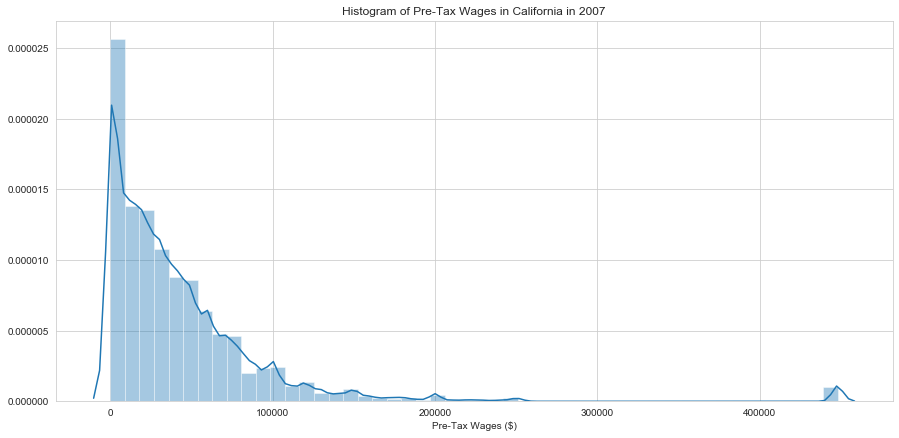

In [9]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2007['Pre-Tax Wages'], label = 'Wages in 2007')
plt.title('Histogram of Pre-Tax Wages in California in 2007')
plt.xlabel('Pre-Tax Wages ($)');

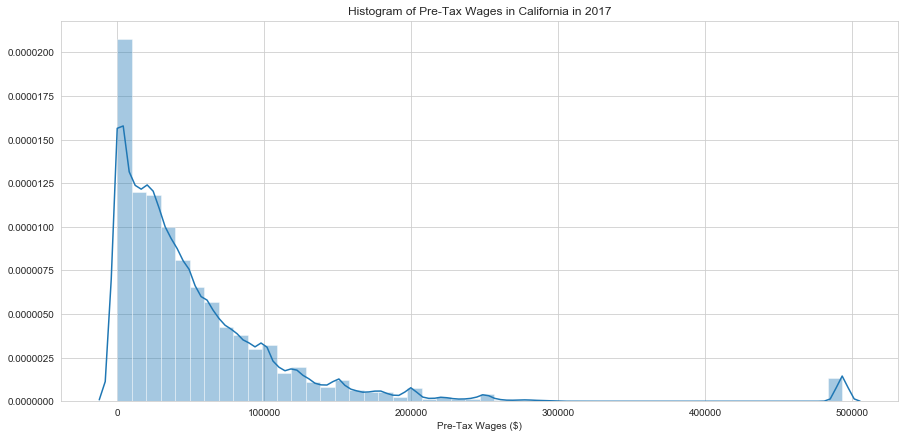

In [10]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2017['Pre-Tax Wages'], label = 'Wages in 2017')
plt.title('Histogram of Pre-Tax Wages in California in 2017')
plt.xlabel('Pre-Tax Wages ($)');

**3A.1.2 Task: Compare these two histograms. Is there a significant difference in distribution of wages between 2007 and 2017?**

[Double click on this cell and write your answer here]

Now that we have gotten a taste for analyzing data and interpreting graphs, let's move on to looking at industries and occupations of workers. 

### 2. Top Industries & Occupations in 2007 vs. 2017

What were the top 10 industries that survey respondents worked in between 2007 and 2017? 

**Run the cell below. Adjust the slider to select the **

In [11]:
(industry_2007['Industry'].value_counts(normalize = True) * 100)[0:10]

Transportation, Warehouse         11.834301
Health Care                       10.863057
Retail Trade                      10.753058
Manufacturing                     10.230561
Educational Services               9.163693
Company Management                 7.975575
Accomodation and Food Services     6.149337
Other services                     4.886219
Finance and Insurance              4.724970
Public Administration              4.501222
Name: Industry, dtype: float64

In [12]:
(industry_2017['Industry'].value_counts(normalize = True) * 100)[0:10]

Health Care                       12.394375
Transportation, Warehouse         10.925000
Retail Trade                       9.993125
Company Management                 9.558125
Educational Services               9.356250
Manufacturing                      9.324375
Accomodation and Food Services     7.011250
Other services                     5.086250
Public Administration              4.454375
Waste Management                   4.379375
Name: Industry, dtype: float64

**3A.2.1 Task: How have the top 10 industries of workers between 2007 and 2017 changed?**

[Double click on this cell and write your answer here]

### Changes in Top 5 Occupations

In [34]:
#This cell reads our data into the notebook. Just run it.

occupation_seven = pd.read_csv('occupation_2007.csv')
occupation_seventeen = pd.read_csv('occupation_2017.csv')
occupation = pd.concat([occupation_seven, occupation_seventeen])

First, lets visualize any possible changes in the top 5 occupations from 2007 to 2017.

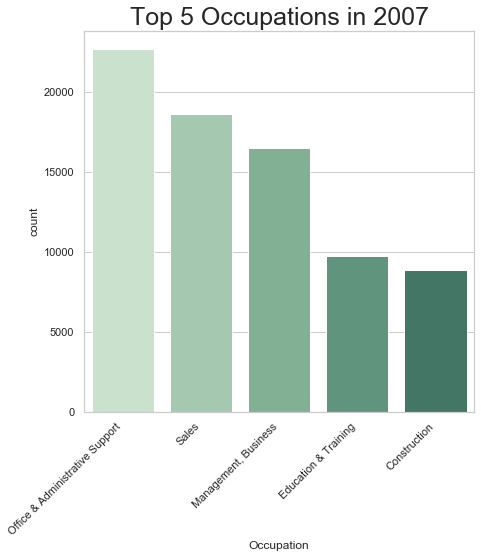

In [36]:
plt.figure(figsize=(7, 7))
p = sns.countplot(data=occupation_seven,
                  x = 'Occupation',
                  order=occupation_seven['Occupation'].value_counts(sort=True).index[0:5],
                 palette = sns.color_palette("ch:2.5,-.2,dark=.3"))
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
p.set_title('Top 5 Occupations in 2007', fontdict = {'fontsize': 25});
p.set_xlabel('Occupation');

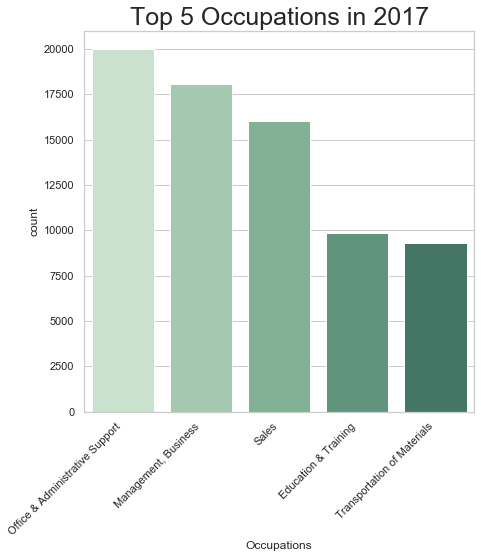

In [37]:
plt.figure(figsize=(7, 7))
ax = sns.countplot(data=occupation_seventeen,
                  x = 'Occupation',
                   order=occupation_seventeen['Occupation'].value_counts(sort=True).index[0:5], 
                  palette = sns.color_palette("ch:2.5,-.2,dark=.3"))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top 5 Occupations in 2017', fontdict = {'fontsize': 25});
ax.set_xlabel('Occupations');

<div class="alert alert-success">
<b> What changes do you see in the top 5 occupation from 2007 to 2017? If there are changes, what are the differences between 2007 and 2017? </b> 
</div>

##### Your answer here

Let's visualize the top 5 occupations for both years side by side.

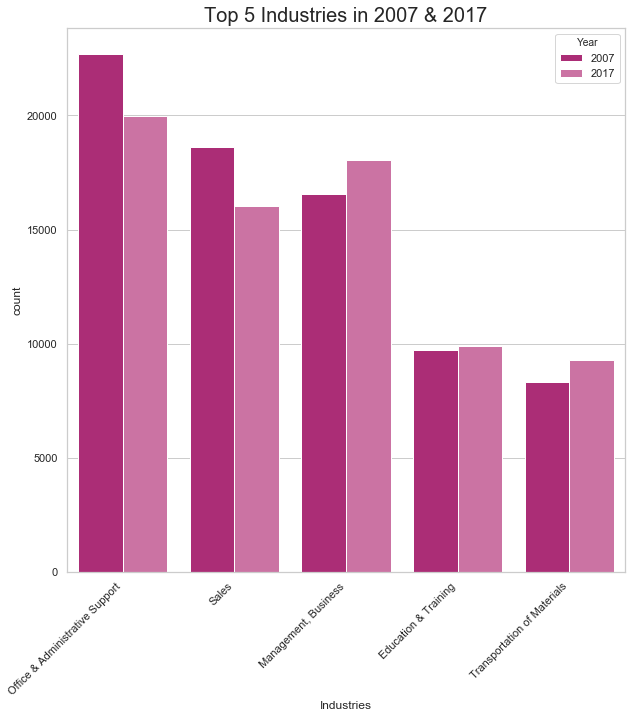

In [38]:
plt.figure(figsize=(10,10));
p = sns.countplot(data=occupation,
                  x = 'Occupation',
                  hue = 'Year', order=occupation['Occupation'].value_counts(sort=True).index[0:5], 
                 palette = sns.color_palette("PiYG", 10))
p.set_xticklabels(p.get_xticklabels(), rotation=45, ha="right")
p.set_title('Top 5 Industries in 2007 & 2017', fontdict= {'fontsize' : 20});
p.set_xlabel('Industries');

<div class="alert alert-success">
<b> Does this graph help visualize the changes in top 5 industries in a better way? If so, how? </b> 
</div>

##### Your answer here.

### Top 5 Occupations by County

Run the cell below. You should see a drop-down menu that allows youo to select one of the counties that our dataset contains. If you are an LA native, pick your county and analyze what the top 5 occupations were in 2007 and 2017. 

In [39]:
def plot_occupations(county):
    plt.figure(figsize=(10,10));
    county_top_5 = occupation[occupation['County'] == county]
    p = sns.countplot(data=county_top_5,
                  x = 'Occupation',
                  hue = 'Year', order=county_top_5['Occupation'].value_counts(sort=True).index[0:5], 
                     palette = sns.color_palette("deep", 10))
    p.set_xticklabels(p.get_xticklabels(), rotation=45, ha='right')
    p.set_title('Top 5 Occupations in 2007 & 2017 in ' + str(county));
    p.set_xlabel('Occupations');
    
county_widget = widgets.Dropdown(
    options=list(occupation['County'].value_counts().index),
    value=list(occupation['County'].value_counts().index)[0],
    description='Select County:',
    disabled=False,
)

interact(plot_occupations, county=county_widget);

interactive(children=(Dropdown(description='Select County:', options=('Los Angeles-Long Beach-Anaheim, CA', 'S…

<div class="alert alert-success">
<b> What difference, if any, do you see in the top 5 occupations in both years between our entire dataset and your county/the county you selected? How does this reflect the history of the county ? </b> 
</div>

##### Your answer here.

## B) Income Distribution

For this category, we will look at distributions of income with respect to other variables. First, we will simply compare the distribution of incomes for survey respondents. 

**Run the cells below.**

### 1. Distributions of Income

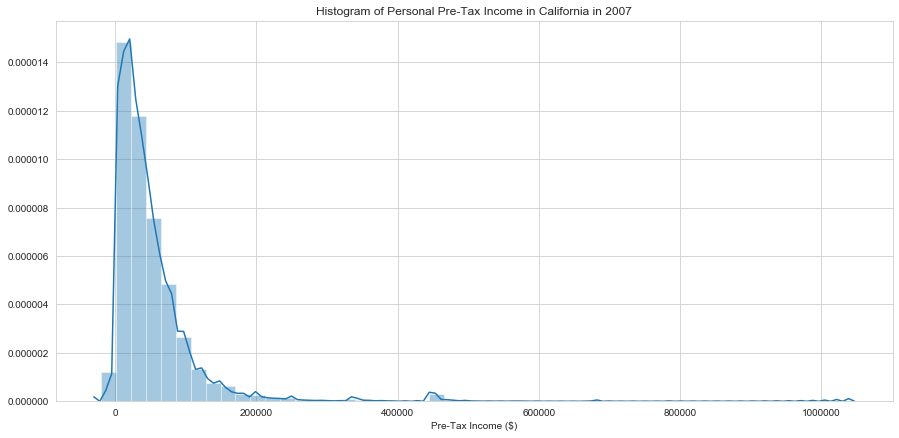

In [13]:
plt.figure(figsize = (15, 7))
sns.distplot(poverty_2007['Personal Pre-Tax Income'], label = 'Wages in 2007')
plt.title('Histogram of Personal Pre-Tax Income in California in 2007')
plt.xlabel('Pre-Tax Income ($)');

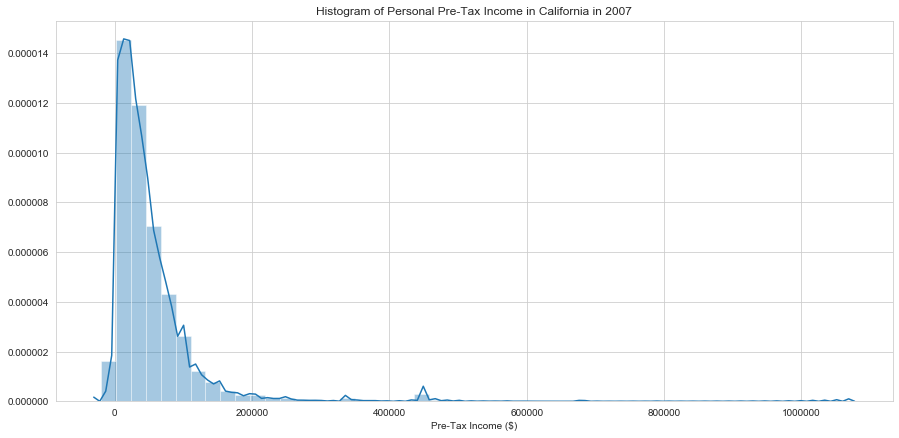

In [14]:
plt.figure(figsize = (15, 7))
sns.distplot(industry_2007['Personal Pre-Tax Income'], label = 'Wages in 2007')
plt.title('Histogram of Personal Pre-Tax Income in California in 2007')
plt.xlabel('Pre-Tax Income ($)');

**3B.1.1 Task: Analyze the shapes of these histograms. How are they similar/different? Compare them with their respective histogram for wages, which we generated earlier. Are there any differences? Why might these differences arise?**

[Double click on this cell and write your answer here]

### 2. Statistics 

Over the past decade, the issue of income inequality has increasingly manifested, across the United States. Let's see if our dataset can provide evidence for this claim. 

Specifically, let's test if the gap between bottom and top percentile incomes have increased or decreased over a span of a decade. 

**Run the cell below. **

In [15]:
first_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 1)
tenth_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 10)
twenty_fifth_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 25)
seventy_fifth_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 75)
ninety_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 90)
ninety_ninth_2007 = np.percentile(poverty_2007['Personal Pre-Tax Income'], 99)
diff_1 = np.round(seventy_fifth_2007 - twenty_fifth_2007, 2)
diff_2 = np.round(ninety_2007 - tenth_2007, 2)
diff_3 = np.round(ninety_ninth_2007 - first_2007, 2)
print("The gap between the 75th and 25th percentile income is: {}".format(diff_1))
print("The gap between the 10th and 90th percentile income is: {}".format(diff_2))
print("The gap between the 1st and 99th percentile income is: {}".format(diff_3))

The gap between the 75th and 25th percentile income is: 48872.5
The gap between the 10th and 90th percentile income is: 96000.0
The gap between the 1st and 99th percentile income is: 436596.04


In [16]:
first_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 1)
tenth_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 10)
twenty_fifth_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 25)
seventy_fifth_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 75)
ninety_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 90)
ninety_ninth_2017 = np.percentile(poverty_2017['Personal Pre-Tax Income'], 99)
diff_1 = np.round(seventy_fifth_2017 - twenty_fifth_2017, 2)
diff_2 = np.round(ninety_2017 - tenth_2017, 2)
diff_3 = np.round(ninety_ninth_2017 - first_2017, 2)
print("The gap between the 75th and 25th percentile income is: {}".format(diff_1))
print("The gap between the 10th and 90th percentile income is: {}".format(diff_2))
print("The gap between the 1st and 99th percentile income is: {}".format(diff_3))

The gap between the 75th and 25th percentile income is: 59000.0
The gap between the 10th and 90th percentile income is: 122000.0
The gap between the 1st and 99th percentile income is: 492400.0


**Compare these statistics. Can we say that there has been a definite increase in income inequality from 2007 to 2017? Why might these numbers be misleading?**

[Double click on this cell and write your answer here]


### 3. Income by City

In [17]:
income_by_city = poverty_2007.groupby('City').mean()[['Personal Pre-Tax Income']].sort_values('Personal Pre-Tax Income')
income_by_city

,Personal Pre-Tax Income
City,
"East Los Angeles, CA",25916.847291
"El Monte, CA",27313.840580
"Santa Ana, CA",30392.516715
"Pomona, CA",32638.627586
"Norwalk, CA",33111.790588
"Ontario, CA",33363.031199
"San Bernardino, CA",33512.626113
"Inglewood, CA",34616.382812
"Oxnard, CA",35315.809380


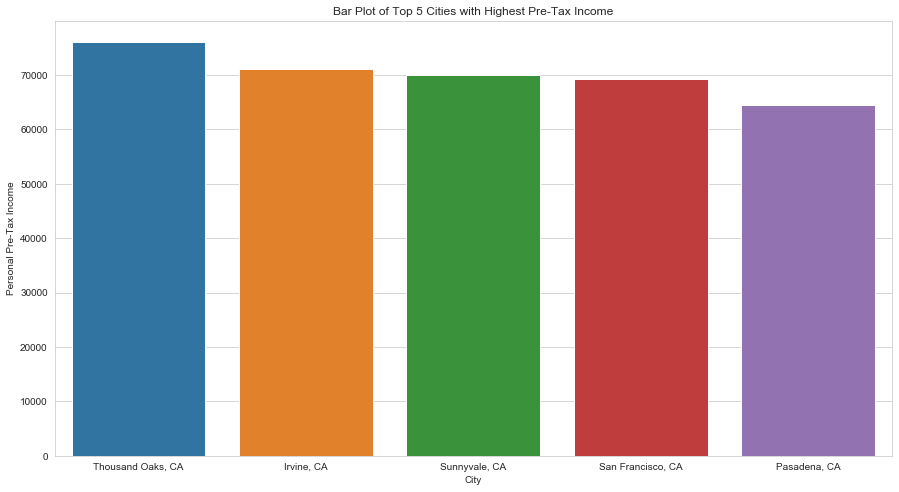

In [18]:
plt.figure(figsize = (15, 8))
top_5_income_by_city = income_by_city.sort_values('Personal Pre-Tax Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Personal Pre-Tax Income', data = top_5_income_by_city)
plt.title('Bar Plot of Top 5 Cities with Highest Pre-Tax Income');

**Do some research into these cities. How may they be related and why might that explain their presence in the highest average incomes in California?**

[Double click on this cell and write your answer here]


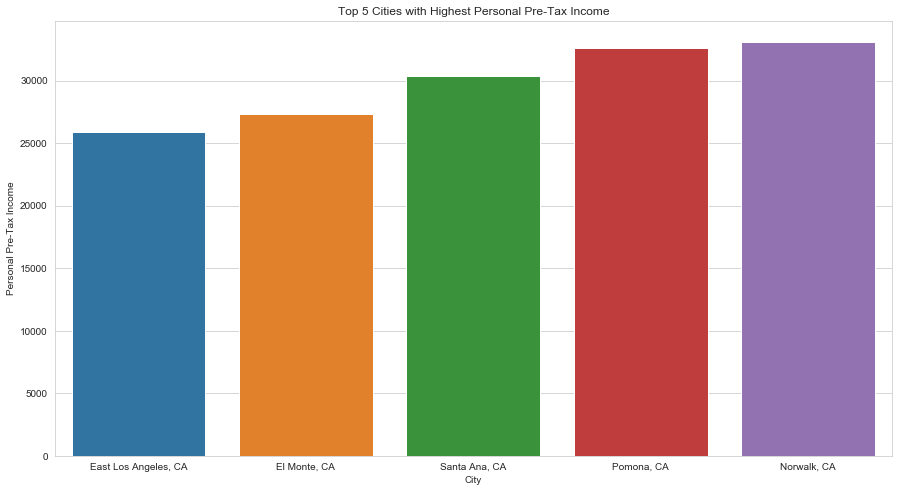

In [19]:
plt.figure(figsize = (15, 8))
bottom_5_income_by_city = income_by_city.sort_values('Personal Pre-Tax Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Personal Pre-Tax Income', data = bottom_5_income_by_city)
plt.title('Top 5 Cities with Highest Personal Pre-Tax Income');

**Do some research into these cities. How may they be related and why might that explain their presence in the lowest average incomes in California?**

[Double click on this cell and write your answer here]


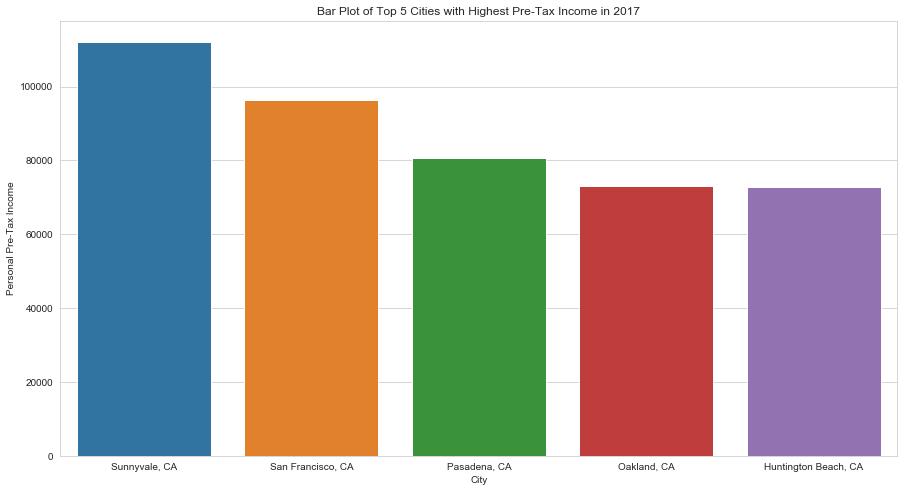

In [20]:
plt.figure(figsize = (15, 8))
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Personal Pre-Tax Income']].sort_values('Personal Pre-Tax Income')
top_5_income_by_city_2017 = income_by_city_2017.sort_values('Personal Pre-Tax Income', ascending = False)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Personal Pre-Tax Income', data = top_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Highest Pre-Tax Income in 2017');

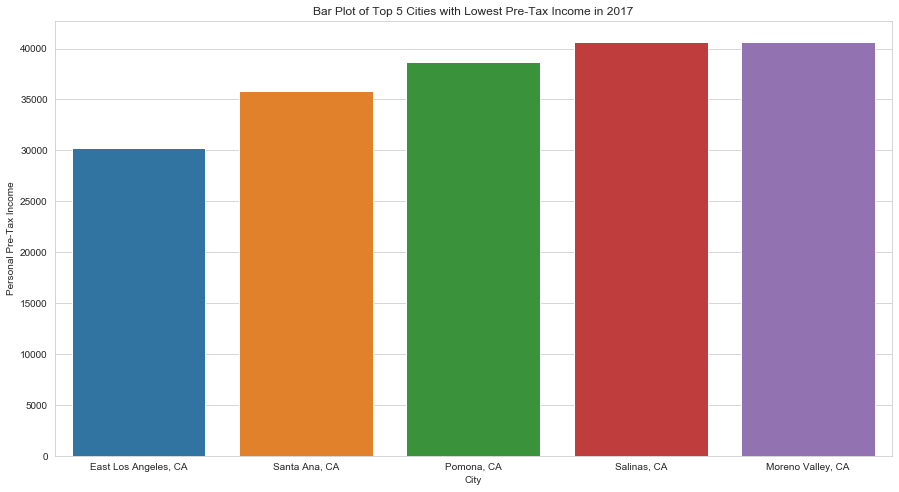

In [21]:
plt.figure(figsize = (15, 8))
income_by_city_2017 = poverty_2017.groupby('City').mean()[['Personal Pre-Tax Income']].sort_values('Personal Pre-Tax Income')
bottom_5_income_by_city_2017 = income_by_city_2017.sort_values('Personal Pre-Tax Income', ascending = True)[0:5].reset_index()
sns.barplot(x = 'City', y = 'Personal Pre-Tax Income', data = bottom_5_income_by_city_2017)
plt.title('Bar Plot of Top 5 Cities with Lowest Pre-Tax Income in 2017');

### 4. Income by Type of Worker 

In [22]:
tow_inc_2007 = poverty_2007.groupby('Type of Worker').mean()[['Personal Pre-Tax Income']]
tow_inc_2007

,Personal Pre-Tax Income
Type of Worker,
Self-employed,71612.605884
Works for wages,48610.543783


In [23]:
tow_inc_2017 = poverty_2017.groupby('Type of Worker').mean()[['Personal Pre-Tax Income']]
tow_inc_2017

,Personal Pre-Tax Income
Type of Worker,
Self-employed,73425.596362
Works for wages,61144.528192


### 5. Income by Ownership Status

In [24]:
own_inc_2007 = poverty_2007.groupby('Ownership Status').mean()[['Personal Pre-Tax Income']]
own_inc_2007

,Personal Pre-Tax Income
Ownership Status,
Owned or being bought (loan),60067.291374
Rented,35285.203216


In [26]:
own_inc_2017 = poverty_2017.groupby('Ownership Status').mean()[['Personal Pre-Tax Income']]
own_inc_2017

,Personal Pre-Tax Income
Ownership Status,
Owned or being bought (loan),73987.353987
Rented,45477.392284


In [27]:
own_inc_2007 = poverty_2007.groupby(['Ownership Status', 'City']).mean()[['Personal Pre-Tax Income']]
own_inc_2007

Personal Pre-Tax Income
Ownership Status             City                                                             
Owned or being bought (loan) Anaheim, CA                                          51689.909497
                             Bakersfield, CA                                      47313.994664
                             Burbank, CA                                          56070.405530
                             Chula Vista, CA                                      50608.763235
                             Corona, CA                                           53867.785461
                             Costa Mesa, CA                                       57509.938567
                             Downey, CA                                           49617.825688
                             East Los Angeles, CA                                 32274.339623
                             El Monte, CA                                         31663.744292
                             Fontana, CA                                          38850.938931
                             Fresno, CA                                           43577.408932
                             Fullerton, CA                                        60475.132768
                             Garden Grove, CA                                     41280.458904
                             Glendale, CA                                         70202.906780
                             Huntington Beach, CA                                 72202.377778
                             Inglewood, CA                                        42008.971264
                             Irvine, CA                                           83333.158307
                             Lancaster, CA                                        44369.633423
                             Long Beach, CA                                       59321.610996
                             Los Angeles, CA                                      65299.638466
                             Modesto, CA                                          47367.212803
                             Moreno Valley, CA                                    38855.818352
                             Norwalk, CA                                          34513.456456
                             Not in identifiable city (or size group)             60934.523346
                             Oakland, CA                                          74423.889676
                             Ontario, CA                                          36325.200000
                             Orange, CA                                           67891.828921
                             Oxnard, CA                                           39779.453303
                             Palmdale, CA                                         45073.925641
                             Pasadena, CA                                         81681.376344
...                                                                                        ...
Rented                       Irvine, CA                                           50021.243968
                             Lancaster, CA                                        30518.312500
                             Long Beach, CA                                       29526.506438
                             Los Angeles, CA                                      32424.590561
                             Modesto, CA                                          29525.495614
                             Moreno Valley, CA                                    24579.821429
                             Norwalk, CA                                          28038.369565
                             Not in identifiable city (or size group)             35772.447164
                             Oakland, CA                                          36828.766846
                             Ontario, CA                                         

In [28]:
own_inc_2017 = poverty_2017.groupby(['Ownership Status', 'City']).mean()[['Personal Pre-Tax Income']]
own_inc_2017

Personal Pre-Tax Income
Ownership Status             City                                                             
Owned or being bought (loan) Antioch, CA                                          57023.242188
                             Downey, CA                                           58522.983193
                             East Los Angeles, CA                                 36004.863388
                             Elk Grove, CA                                        67567.730061
                             Glendale, CA                                         87332.987805
                             Huntington Beach, CA                                 85539.306050
                             Inglewood, CA                                        50176.852792
                             Long Beach, CA                                       67019.842053
                             Los Angeles, CA                                      75179.964231
                             Moreno Valley, CA                                    44954.856597
                             Not in identifiable city (or size group)             73692.983670
                             Oakland, CA                                          95751.437848
                             Ontario, CA                                          46434.057971
                             Palmdale, CA                                         51988.345154
                             Pasadena, CA                                        109489.416910
                             Pomona, CA                                           46919.871465
                             Rancho Cucamonga, CA                                 62227.142857
                             Roseville, CA                                        74926.377778
                             Salinas, CA                                          47548.105850
                             San Francisco, CA                                   112180.139821
                             Santa Ana, CA                                        41134.486874
                             Sunnyvale, CA                                       131863.333333
                             Visalia, CA                                          57978.764479
Rented                       Antioch, CA                                          39246.111111
                             Downey, CA                                           39262.787879
                             East Los Angeles, CA                                 26463.661972
                             Elk Grove, CA                                        40515.864662
                             Glendale, CA                                         47315.355556
                             Huntington Beach, CA                                 52493.504274
                             Inglewood, CA                                        34266.757812
                             Long Beach, CA                                       36945.434584
                             Los Angeles, CA                                      41599.521757
                             Moreno Valley, CA                                    31200.042373
                             Not in identifiable city (or size group)             44503.800405
                             Oakland, CA                                          53610.503541
                             Ontario, CA                                          33006.016260
                             Palmdale, CA                                         35534.812834
                             Pasadena, CA                                         53409.449036
                             Pomona, CA                                           24928.461538
                             Rancho Cucamonga, CA                                 44381.666667
                             Roseville, CA                                       

### 6. Income by Race

In [29]:
race_inc_2007 = poverty_2007.groupby('Race').mean()[['Personal Pre-Tax Income']]
race_inc_2007

,Personal Pre-Tax Income
Race,
African American,42454.738886
American Indian or Alaska Native,38468.362805
Asian/Pacific Islander,53189.942439
Other,29865.830437
Two or more races,39988.425743
White,57124.343847


In [30]:
race_inc_2017 = poverty_2017.groupby('Race').mean()[['Personal Pre-Tax Income']]
race_inc_2017

,Personal Pre-Tax Income
Race,
African American,49967.737596
American Indian or Alaska Native,42265.667396
Asian/Pacific Islander,69564.375720
Other,34251.965010
Two or more races,53239.820593
White,68311.549867


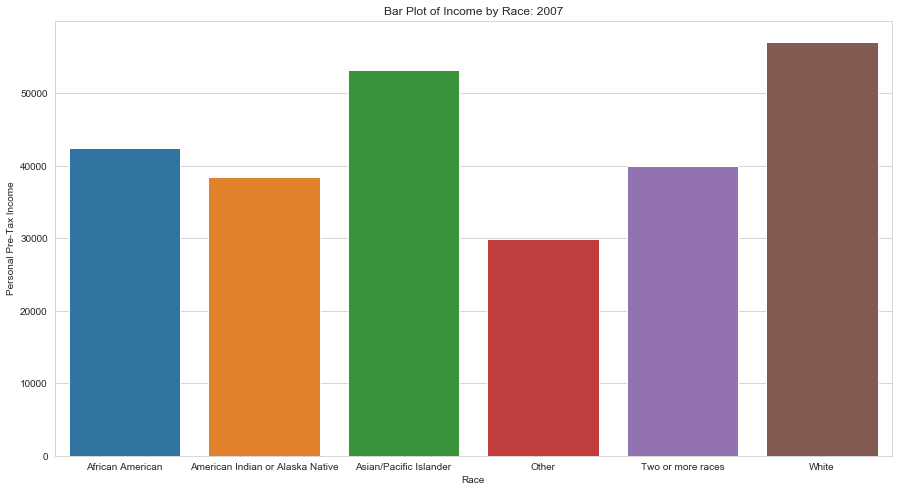

In [31]:
plt.figure(figsize = (15, 8))
race_income_2007 = race_inc_2007.reset_index()
sns.barplot(x = 'Race', y = 'Personal Pre-Tax Income', data = race_income_2007)
plt.title('Bar Plot of Income by Race: 2007');

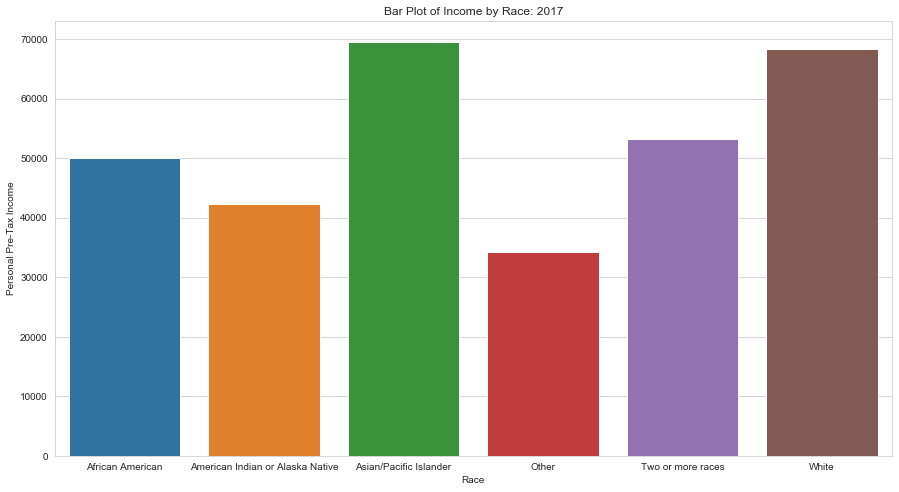

In [32]:
plt.figure(figsize = (15, 8))
race_income_2017 = race_inc_2017.reset_index()
sns.barplot(x = 'Race', y = 'Personal Pre-Tax Income', data = race_income_2017)
plt.title('Bar Plot of Income by Race: 2017');

## C) Education level 

Simply run the cell below to load the education datasets.

In [40]:
education_seven = pd.read_csv('education_2007.csv', dtype={'Hours worked per week': int})
education_seventeen = pd.read_csv('education_2017.csv', dtype={'Hours worked per week': int})
education = pd.concat([education_seven, education_seventeen])

### Education and Income
The graph below maps out the total income received based on education level. The education levels can be seen in the x-axis, while the y-axis represents the total income. 

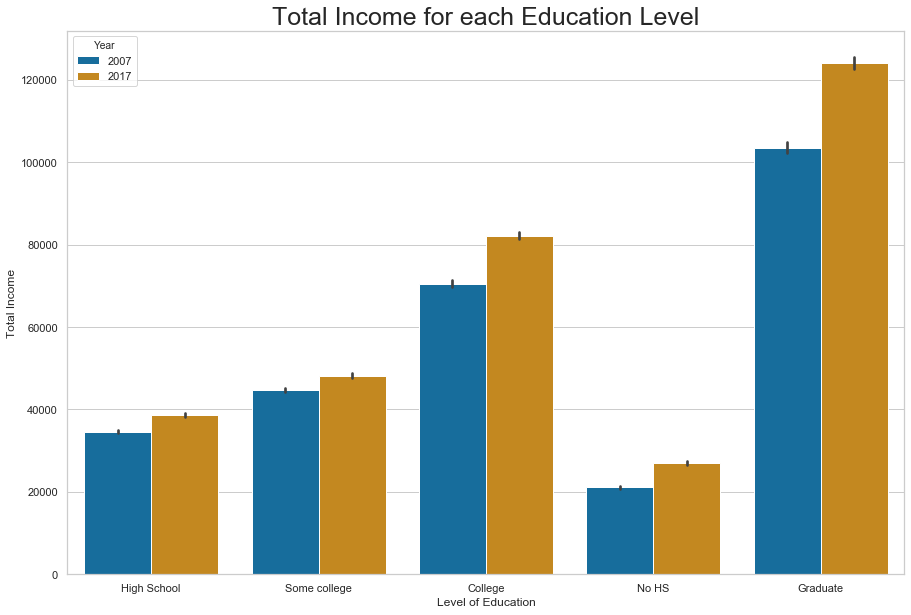

In [42]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(x='Education Status', y='Personal Pre-Tax Income', 
                 hue='Year', data=education, 
                palette = sns.color_palette("colorblind", 10))
ax.set_xlabel('Level of Education')
ax.set_ylabel('Total Income')
ax.set_title('Total Income for each Education Level', fontdict={'fontsize': 25});

<div class="alert alert-success">
<b> Living wage is defined as the wage that a worker needs to fulfill their basic needs. This is not to be confused with minimum wage, which is the minimum an employer can pay its employees. According to livingwage.mit.edu, the living wage in America on 2017 was about $16.07/hour. For a regular 40 hour week, that means having an income of about 35K. 

According to this dataset, what level of education ensures a livable income?  </b> 
</div>

##### Your answer here.

### Types of Workers

Our dataset also tells us whether a person was self-employed or working for wages under an employer. Let's try to to find out what the average level of education is within self-employed workers.

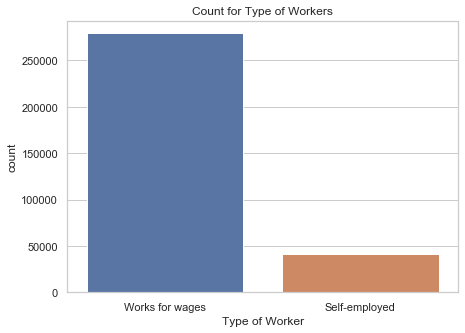

In [43]:
plt.figure(figsize=(7, 5))
sns.countplot(education['Type of Worker']);
plt.title('Count for Type of Workers');

This countplot visualizes the amount of workers who are employed and the amount of workers who are self-employed in our dataset. We can see that there is significantly less self-employed workers. Now let's analyze what their education level is. 

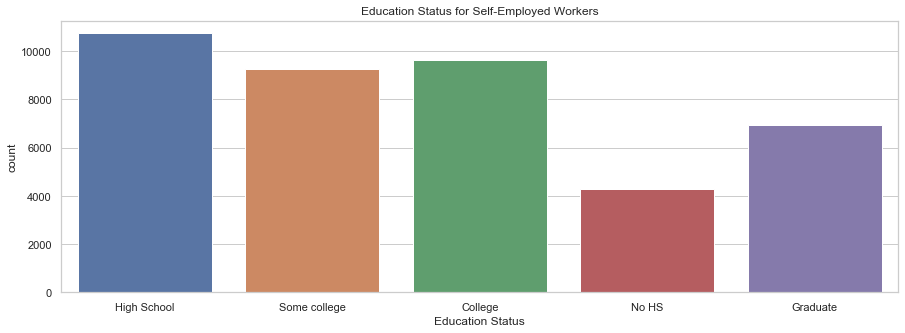

In [44]:
plt.figure(figsize=(15, 5))
sns.countplot(education[education['Type of Worker'] == 'Self-employed']['Education Status']);
plt.title('Education Status for Self-Employed Workers');

<div class="alert alert-success">
<b>What does this graph tell us about the  level of education in self-employed workers? Are you surprised by the results? How did these data disprove what you believed was the truth? If this was a result you were expecting, how do these data back up your beliefs?</b>
    </div>

##### Your answer here.

The following graphs are called violin plots. They help us visualize the distribution for a given category. Read more here "https://mode.com/blog/violin-plot-examples" if you are interested in learning more about violin plots. For now, we will use violin plots in order to help us visualize the distribution in personal income based on education level for self-employed and employed workers.

<img src="https://images.ctfassets.net/fi0zmnwlsnja/sdfgtcRp16wTNOcRceGQm/5bfcb73d2261d49ff20dd7857e0152b1/Screen_Shot_2019-03-01_at_11.36.10_AM.png" style="width:300px;height:300px;"/>

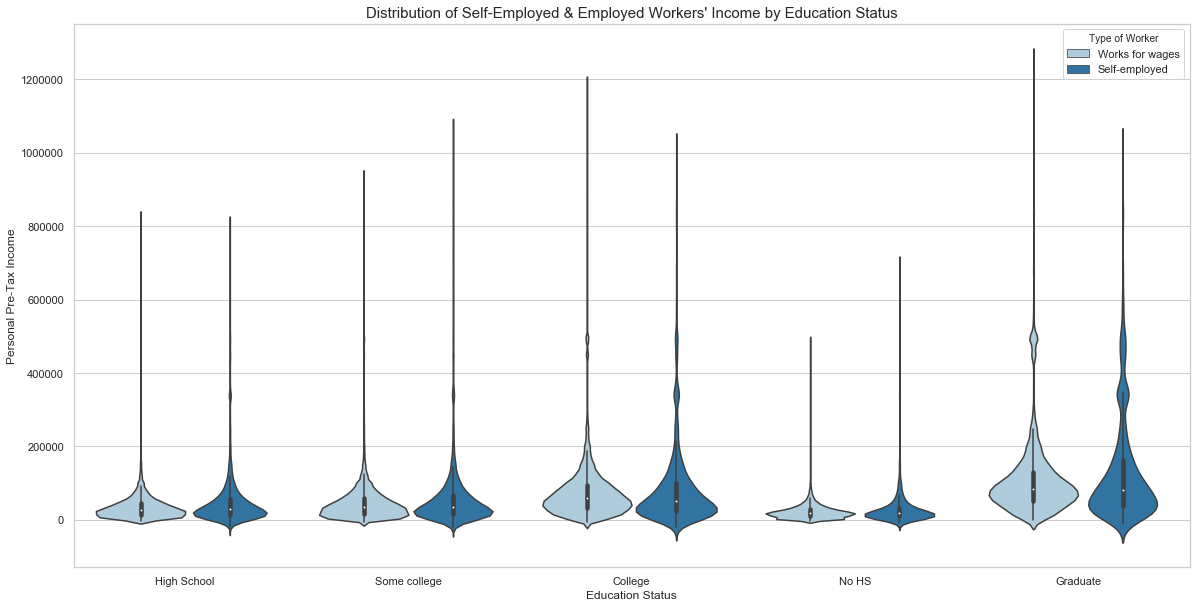

In [47]:
plt.figure(figsize=(20, 10))
sns.violinplot(x='Education Status', y='Personal Pre-Tax Income', 
              data=education, hue='Type of Worker', palette=sns.color_palette("Paired"))
plt.title("Distribution of Self-Employed & Employed Workers' Income by Education Status", 
          fontdict={'fontsize': 15});

The long tail in our violin plots mean that there are some people whose income reached those values. For example, for those self-employed workers who completed college, we can see that the tail of our violin plot reaches above 100,000. This means that there are some self-employed workers who completed college and are at or above an income of 100K. However, since this violin plot has most of its mass within the 0-20k income range, this scenario is not very likely, as the distribution of income is mostly found within the 0-20K range. 


<div class="alert alert-success">
<b>The graph above helps us see that it does not matter so much whether one is self-employed or employed, but that education level matters much more. How can we reach this conclusion based off the graph?</b>
    </div>

##### Your answer here.

### Race

How are race and level of education related?

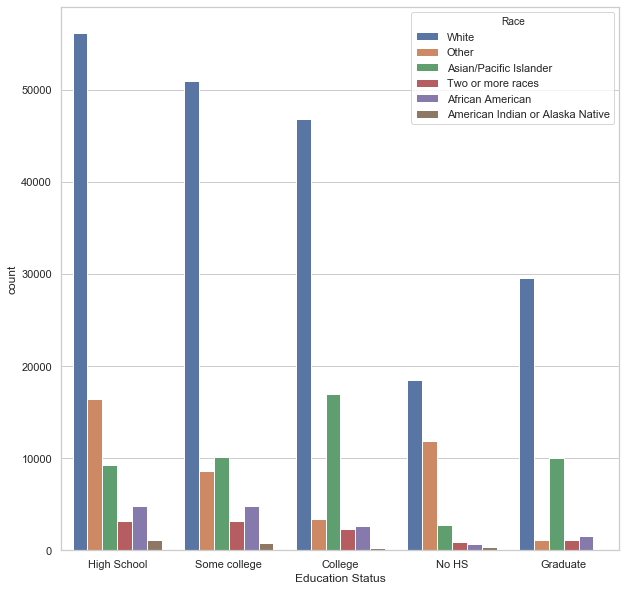

In [48]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Education Status', hue='Race', data=education);

<Figure size 720x1080 with 0 Axes>

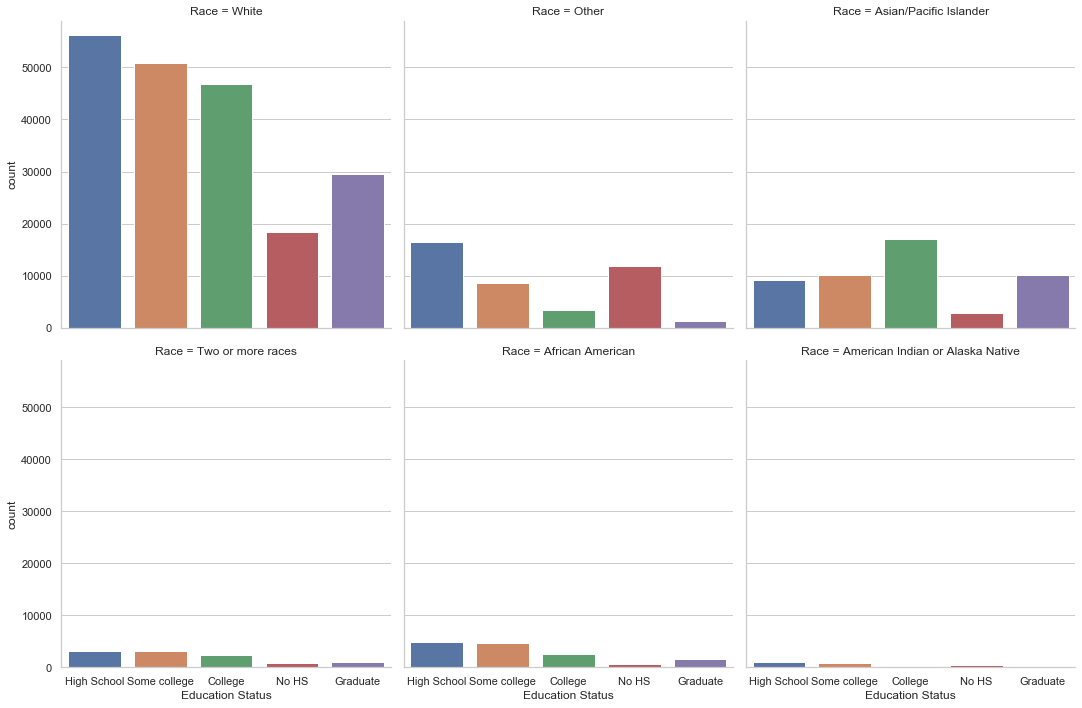

In [49]:
plt.figure(figsize=(10, 15));
ax = sns.catplot(x='Education Status', col='Race', 
            data=education, kind='count', col_wrap=3, orient="h");

<div class="alert alert-success">
<b> What do these visualizations tell you about the level of education that each race receives? Our dataset clearly has more White-identifying individuals so it helps to think about each bar in our bar graph as a proportion for that race. Thus, for Asian/Pacific Islanders, there is higher proportion of people who finish college than there is high school dropouts, but for those whose race is "Other," there is a higher proportion of high school dropouts than there is college graduates. What do these graphs help tell us about our data? How can these observations help reinforce what we have found above?  </b> 
</div>

##### Your answer here.

Our dataset contains a separate column for Hispanic-identifying individuals. We can display the same visualization for those in each category in the `Hispanic` column. 

<Figure size 720x1080 with 0 Axes>

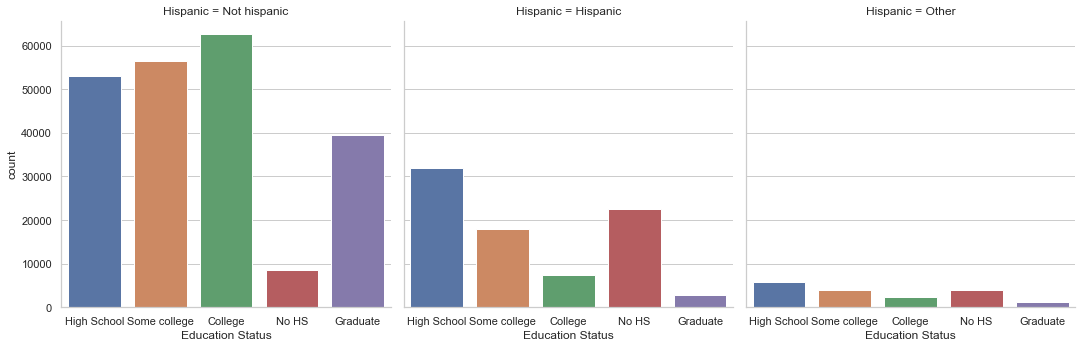

In [50]:
plt.figure(figsize=(10, 15));
ax = sns.catplot(x='Education Status', col='Hispanic', 
            data=education, kind='count', col_wrap=3, orient="h");

<div class="alert alert-success">
<b> Are the results any different from the ones above? If so, what are the differences? </b> 
</div>

##### Your answer here.

## D) Indicators of poverty

What are the indicators of poverty? What relationship does poverty have with the other features (columns) in our dataset?

In [51]:
poverty_seven = pd.read_csv('poverty_2007.csv')
poverty_seventeen = pd.read_csv('poverty_2017.csv')
poverty = pd.concat([poverty_seven, poverty_seventeen])

### Employment Status

For poverty, our data categorizes an individual into one of three categories: `Near Poverty`, `Non-Poverty`, and `Poverty`. We will be looking at those who are in `Poverty` or `Near Poverty`.

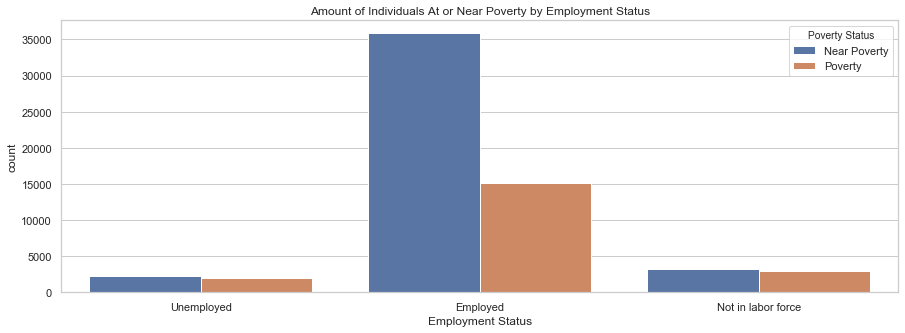

In [52]:
plt.figure(figsize=(15, 5))
all_poverty = poverty[(poverty['Poverty Status'] == 'Poverty') | (poverty['Poverty Status'] == 'Near Poverty')]
sns.countplot(x='Employment Status', data=all_poverty, hue='Poverty Status')
plt.title('Amount of Individuals At or Near Poverty by Employment Status');

### Cities and Occupations in High-Poverty Areas

What are top 5 cities with the highest amount of poverty? Run the cell below, it should output the cities with most citizens at or near poverty.

In [53]:
j = 1
for i in all_poverty['City'].value_counts(sort=True).index[0:5]:
    print(str(j)  + " city: " + str(i))
    j+=1

1 city: Not in identifiable city (or size group)
2 city: Los Angeles, CA
3 city: San Francisco, CA
4 city: Long Beach, CA
5 city: Santa Ana, CA


The top "city" regarding poverty in our dataset is not actually a city, so lets try that again. This time, we will ignore "Not in indetifiable city".

In [54]:
j = 1
for i in all_poverty['City'].value_counts(sort=True).index[1:6]:
    print(str(j)  + " city: " + str(i))
    j+=1

1 city: Los Angeles, CA
2 city: San Francisco, CA
3 city: Long Beach, CA
4 city: Santa Ana, CA
5 city: Oakland, CA


<div class="alert alert-success">
<b> What are the top 5 cities that contain the most poverty? Why do you think that is? </b> 
</div>

##### Your answer here.

What are the top 5 occupations for people in poverty? Run the cell below, it should output the top 5 industries for those at OR near poverty.

In [55]:
j = 1
for i in occupation[(occupation['Poverty Status'] == 'Poverty') | 
                    (occupation['Poverty Status'] == 'Near Poverty')]['Occupation'].value_counts(
    sort=True).index[0:5]:
    print(j, 'Top Occupation:', i)
    j +=1

1 Top Occupation: Office & Administrative Support
2 Top Occupation: Sales
3 Top Occupation: Food Preparation
4 Top Occupation: Transportation of Materials
5 Top Occupation: Building & Grounds Cleaning


<div class="alert alert-success">
<b> What are the top 5 occupations for members in poverty? </b> 
</div>

##### Your answer here.

The graph below maps out the average hours worked per week for each occupation. Look for the 5 occupations we found above.

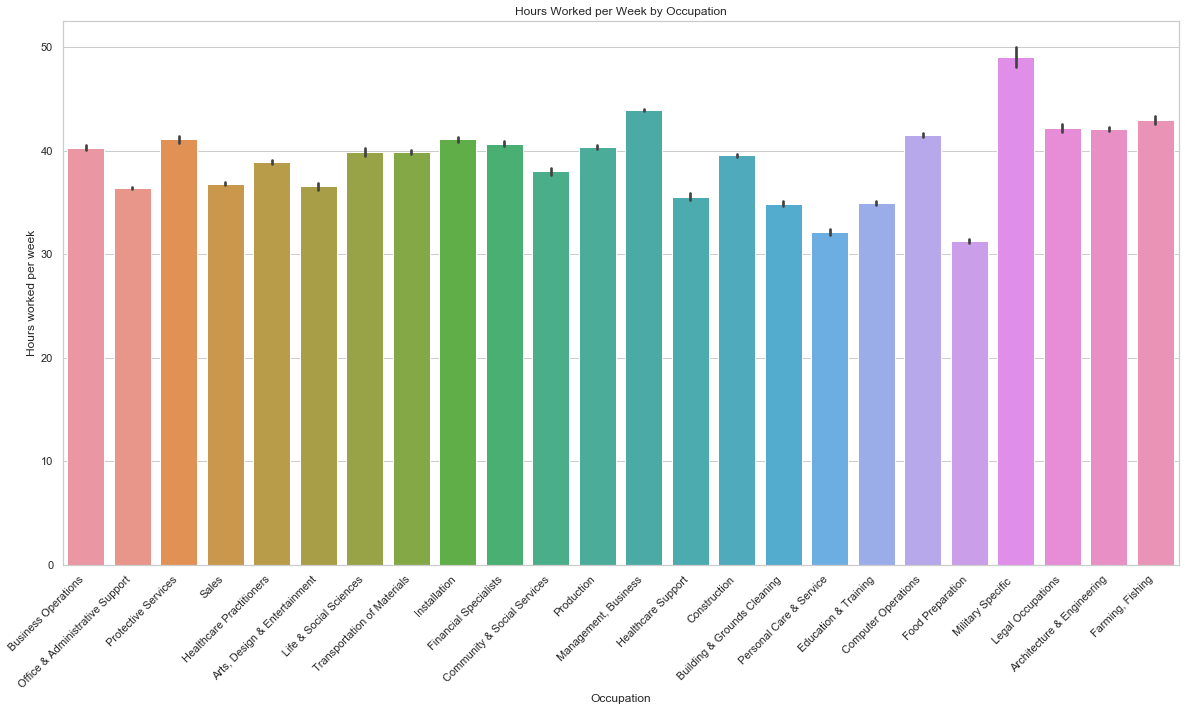

In [57]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Occupation', y='Hours worked per week', data=poverty)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');
plt.title('Hours Worked per Week by Occupation');

<div class="alert alert-success">
<b> What do you notice in terms of hours worked per week for the top 5 industries for those in poverty? Are thse findings surprising? How does the graph above help explain why certain members in certain occupations are in poverty? How can these data help us see what possible indicators of poverty may be? </b> 
</div>

##### Your answer here.

## E) Employment

### 1. Total Employment Statistics by Year

In [107]:
employment_07 =emp_sector_2007.groupby('Employment Status').mean()[['Personal Pre-Tax Income']]
employment_07

,Personal Pre-Tax Income
Employment Status,
Employed,55187.306045
Not in labor force,27299.733291
Unemployed,22349.844229


In [108]:
employment_17 = emp_sector_2017.groupby('Employment Status').mean()[['Personal Pre-Tax Income']]
employment_17

,Personal Pre-Tax Income
Employment Status,
Employed,65696.244687
Not in labor force,32112.935507
Unemployed,27047.457650


In [109]:
change_in_wages_employed = employment_17['Personal Pre-Tax Income'][0] - employment_07['Personal Pre-Tax Income'][0]
change_in_wages_employed

10508.938642390356

### 2. Work Status and Foodstamp Recipient

In [110]:
employment_07 =emp_sector_2007.groupby(['Employment Status', 'Foodstamp Recipient']).count()[['Personal Pre-Tax Income']].rename(columns = {'Personal Pre-Tax Income':'Count'})
employment_17 = emp_sector_2017.groupby(['Employment Status', 'Foodstamp Recipient']).count()[['Personal Pre-Tax Income']].rename(columns = {'Personal Pre-Tax Income':'Count'})
display(employment_07, employment_17)

Count
Employment Status  Foodstamp Recipient        
Employed           No                   137054
                   Yes                    3994
Not in labor force No                    11901
                   Yes                     652
Unemployed         No                     5747
                   Yes                     647

Count
Employment Status  Foodstamp Recipient        
Employed           No                   136006
                   Yes                   11137
Not in labor force No                     7431
                   Yes                     911
Unemployed         No                     3665
                   Yes                     845

### 3. Employment Sector vs. Personal Income

In [111]:
employment_income07 =emp_sector_2007.groupby('Employment Status').mean()[['Personal Pre-Tax Income']]
employment_income17 = emp_sector_2017.groupby('Employment Status').mean()[['Personal Pre-Tax Income']]
display(employment_income07, employment_income17)

,Personal Pre-Tax Income
Employment Status,
Employed,55187.306045
Not in labor force,27299.733291
Unemployed,22349.844229


,Personal Pre-Tax Income
Employment Status,
Employed,65696.244687
Not in labor force,32112.935507
Unemployed,27047.457650


## Bibliography <a id = 'section7'></a>

• https://www.census.gov/programs-surveys/saipe/guidance/model-input-data/cpsasec.html

• https://en.wikipedia.org/wiki/Stratified_sampling

• (TBD)

• (TBD)

___
### Sidenotes:
[1]: Since the size of the original dataset was too large, we are using Stratified Random Samples instead. Refer to the link in the bibliography for more information on our sampling approach. 

___
### Getting extra help

Interested in getting help with learning Python or applying computational analysis? Check out  [Data Peer Consulting](https://data.berkeley.edu/education/data-peer-consulting) in Moffitt library for drop-in, one-on-one questions. For additional workshops designed for people new to computational analysis, take a look at the workshops at [The Dlab](https://dlab.berkeley.edu) (free for Berkeley students!). 

Best  luck!

------------------------------------------------------------------------------------------------------------------------

### Feedback:
Please let us know your thoughts on this notebook!

Fill out the survey at this link: https://docs.google.com/forms/d/e/1FAIpQLSfahkYSKqlEEfC6WMKlaqeIxRVj0r7T4N5lgBf9bRVwRG58wQ/viewform

------------------------------------------------------------------------------------------------------------------------
Notebook developed by: Ritvik Iyer, Carlos Calderon

Data Science Modules: http://data.berkeley.edu/education/modules